# 📘 Bag of Words (BoW) & TF-IDF in NLP

---

## 🔹 1. Where it Belongs in NLP
BoW and TF-IDF are part of the **Statistical Era of NLP**.  
👉 They are early methods for converting text into **numerical features** that can be used by classical machine learning models (like Naive Bayes, Logistic Regression, SVM).  
Even though modern NLP uses embeddings (Word2Vec, BERT), these methods are still valuable for **understanding the foundations**.

---

## 🔹 2. Introduction
When working with text in NLP, we cannot directly feed words into machine learning models.  
We need to **convert text into numbers**.  

Two common methods are:
1. **Bag of Words (BoW):** Count how often each word appears.  
2. **TF-IDF (Term Frequency – Inverse Document Frequency):** Assign weights to words, giving importance to rare but meaningful words.  

---


In [1]:
### 👉 Example Corpus
docs = [
    "Machine learning is amazing and powerful",
    "Deep learning is a subset of machine learning",
    "Natural Language Processing makes machines intelligent"
]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Create BoW model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("\nBag of Words Matrix:\n", X.toarray())


Vocabulary: ['amazing' 'and' 'deep' 'intelligent' 'is' 'language' 'learning' 'machine'
 'machines' 'makes' 'natural' 'of' 'powerful' 'processing' 'subset']

Bag of Words Matrix:
 [[1 1 0 0 1 0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 2 1 0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0 0 1 1 1 0 0 1 0]]


# ⚠️ Limitations of BoW
Ignores word order → "dog bites man" and "man bites dog" look the same.

Frequent common words like "is", "the" dominate.

Creates large, sparse matrices with many zeroes.



# 🔹 3. TF-IDF
👉 What is TF-IDF?

Instead of just counting words, TF-IDF gives higher weight to important words and lowers the weight of common words.

Term Frequency (TF): How often a word appears in a document.

𝑇
𝐹
(
𝑡
,
𝑑
)
=
count of word t in document d
total words in d
TF(t,d)=
total words in d
count of word t in document d
	​


Inverse Document Frequency (IDF): How rare the word is across documents.

𝐼
𝐷
𝐹
(
𝑡
)
=
log
⁡
(
𝑁
1
+
𝑑
𝑓
(
𝑡
)
)
IDF(t)=log(
1+df(t)
N
	​

)

where N = total documents, df(t) = number of documents containing word t.

TF-IDF: Product of TF and IDF.

𝑇
𝐹
-
𝐼
𝐷
𝐹
(
𝑡
,
𝑑
)
=
𝑇
𝐹
(
𝑡
,
𝑑
)
×
𝐼
𝐷
𝐹
(
𝑡
)
TF-IDF(t,d)=TF(t,d)×IDF(t)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF model
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs)

print("Vocabulary:", tfidf.get_feature_names_out())
print("\nTF-IDF Matrix:\n", X_tfidf.toarray())


Vocabulary: ['amazing' 'and' 'deep' 'intelligent' 'is' 'language' 'learning' 'machine'
 'machines' 'makes' 'natural' 'of' 'powerful' 'processing' 'subset']

TF-IDF Matrix:
 [[0.45954803 0.45954803 0.         0.         0.34949812 0.
  0.34949812 0.34949812 0.         0.         0.         0.
  0.45954803 0.         0.        ]
 [0.         0.         0.39312851 0.         0.29898437 0.
  0.59796874 0.29898437 0.         0.         0.         0.39312851
  0.         0.         0.39312851]
 [0.         0.         0.         0.40824829 0.         0.40824829
  0.         0.         0.40824829 0.40824829 0.40824829 0.
  0.         0.40824829 0.        ]]


# Why TF-IDF is Better

Reduces weight of common words.

Highlights unique, meaningful words.

Great for document classification, search engines, and ranking results.

# Summary

Bag of Words (BoW):

Easy, count-based representation.

Good for simple tasks.

TF-IDF:

Smarter, weighted representation.

Better for most NLP applications.

## Visualizing Top TF-IDF Words

To better understand which words are important for each document, we can
plot the **top-scoring TF-IDF terms** as a bar chart. This makes it easy
to see how different documents emphasize different words.

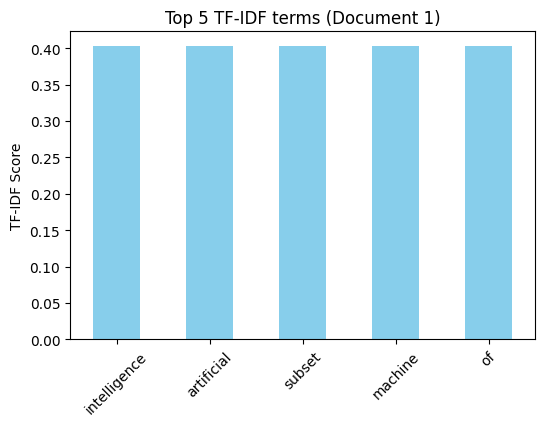

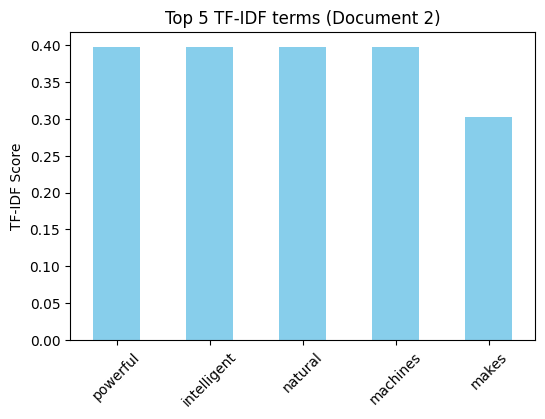

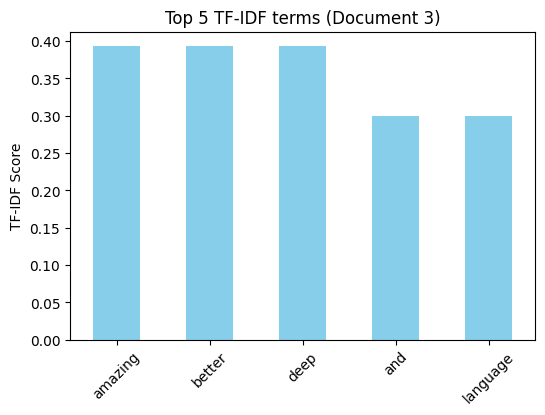

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
docs = [
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing makes machines intelligent and powerful",
    "Deep learning is amazing and makes language processing better"
]

# Build TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)

# Function to plot top TF-IDF terms for each doc
def plot_top_tfidf(doc_index, top_n=5):
    row = df_tfidf.iloc[doc_index]
    top_terms = row.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(6,4))
    top_terms.plot(kind="bar", color="skyblue")
    plt.title(f"Top {top_n} TF-IDF terms (Document {doc_index+1})")
    plt.ylabel("TF-IDF Score")
    plt.xticks(rotation=45)
    plt.show()

# Example: plot for each doc
for i in range(len(docs)):
    plot_top_tfidf(i, top_n=5)
